### Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR

In [2]:
data = pd.read_csv("Geologic_DataSet.csv")

In [3]:
data.head().style.background_gradient(cmap="cool")

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456000,292,3.080000,97.680000,4.640000,1.848000,48.306469
1,8.666000,353,3.542000,55.404000,3.560000,1.504000,41.300912
2,9.814000,259,4.411000,87.360000,3.560000,2.176000,49.688356
3,12.369000,675,2.893000,47.772000,4.320000,1.504000,59.132694
4,12.264000,457,3.498000,13.128000,6.040000,1.520000,39.503121


In [4]:
data.shape

(200, 7)

In [5]:
# descriptive statistic

data.describe().style.background_gradient(cmap='ocean')

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.493805,433.075000,3.265735,57.794340,3.970700,1.571440,50.000000
std,2.079824,173.101415,0.623574,16.955346,1.907119,0.240662,11.505310
min,4.585000,113.000000,1.408000,13.128000,0.100000,0.744000,24.437856
25%,9.038750,312.250000,2.802250,45.306000,2.470000,1.416000,41.961030
50%,10.549000,403.500000,3.250500,59.412000,4.120000,1.568000,49.692285
75%,12.181750,528.750000,3.679500,69.915000,5.400000,1.714000,58.986667
max,16.485000,987.000000,5.093000,101.196000,8.720000,2.296000,77.270733


In [7]:
# check missing values
data.isna().sum()

Porosity (%)                        0
Matrix Perm (nd)                    0
Acoustic impedance (kg/m2s*10^6)    0
Brittleness Ratio                   0
TOC (%)                             0
Vitrinite Reflectance (%)           0
Aroot(K)                            0
dtype: int64

In [8]:
#check duplicates 
duplicate  = data.duplicated()
print(duplicate.sum())

0


In [9]:
data.columns

Index(['Porosity (%)', 'Matrix Perm (nd)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'TOC (%)', 'Vitrinite Reflectance (%)',
       'Aroot(K)'],
      dtype='object')

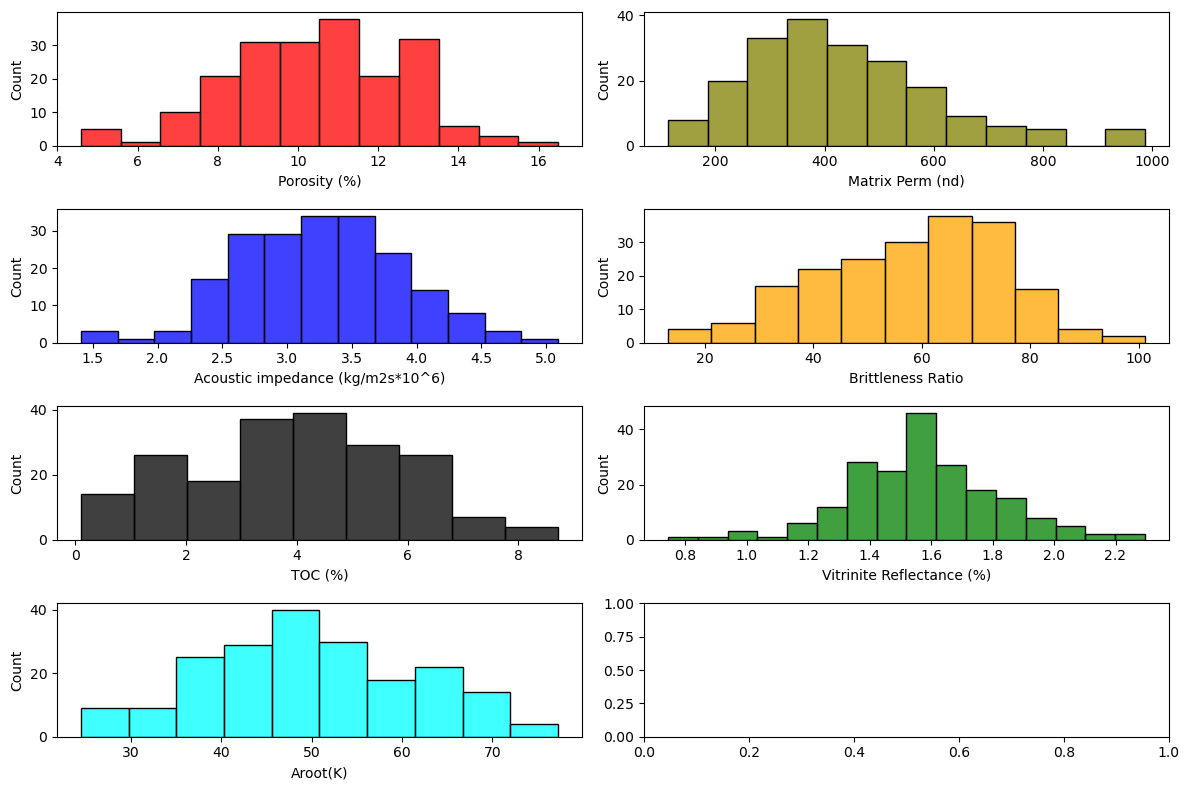

In [15]:
plt.style.use('default')
f, axes = plt.subplots(4,2, figsize=(12,8))
sns.histplot(data['Porosity (%)'], color='red', ax=axes[0,0])
sns.histplot(data['Matrix Perm (nd)'], color='olive',ax=axes[0,1])
sns.histplot(data['Acoustic impedance (kg/m2s*10^6)'], color='blue', ax=axes[1,0])
sns.histplot(data['Brittleness Ratio'], color='orange', ax=axes[1,1])
sns.histplot(data['TOC (%)'], color='black', ax=axes[2,0])
sns.histplot(data['Vitrinite Reflectance (%)'], color ='green', ax=axes[2,1])
sns.histplot(data['Aroot(K)'], color='cyan', ax=axes[3,0])

plt.tight_layout()
plt.show()

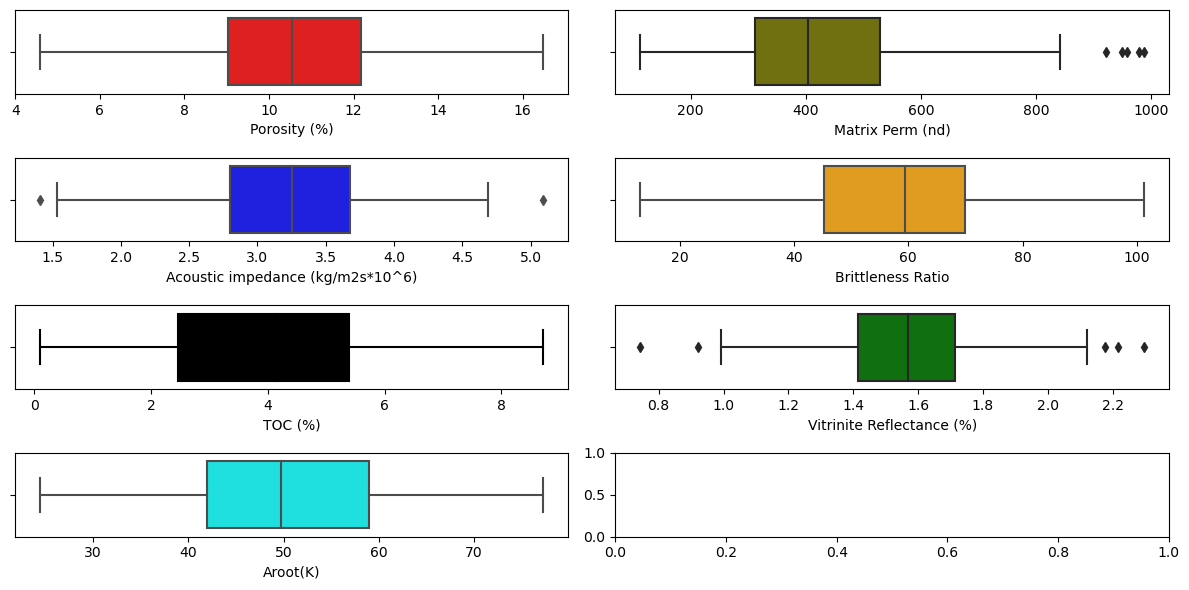

In [16]:
plt.style.use('default')
f, axes = plt.subplots(4,2, figsize=(12,6))
sns.boxplot(x=data['Porosity (%)'],color='red', ax=axes[0,0])
sns.boxplot(x=data['Matrix Perm (nd)'], color='olive',ax=axes[0,1])
sns.boxplot(x=data['Acoustic impedance (kg/m2s*10^6)'], color='blue', ax=axes[1,0])
sns.boxplot(x=data['Brittleness Ratio'], color='orange', ax=axes[1,1])
sns.boxplot(x=data['TOC (%)'], color='black', ax=axes[2,0])
sns.boxplot(x=data['Vitrinite Reflectance (%)'], color ='green', ax=axes[2,1])
sns.boxplot(x=data['Aroot(K)'], color='cyan', ax=axes[3,0])

plt.tight_layout()

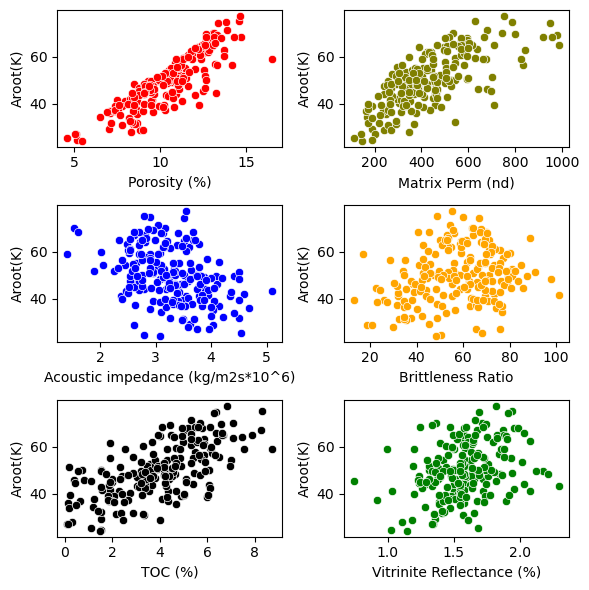

In [19]:
plt.style.use('default')
f, axes = plt.subplots(3,2, figsize=(6,6))
sns.scatterplot(x=data['Porosity (%)'], y=data['Aroot(K)'],color='red', ax=axes[0,0])
sns.scatterplot(x=data['Matrix Perm (nd)'],y= data['Aroot(K)'], color='olive',ax=axes[0,1])
sns.scatterplot(x=data['Acoustic impedance (kg/m2s*10^6)'],y= data['Aroot(K)'], color='blue', ax=axes[1,0])
sns.scatterplot(x=data['Brittleness Ratio'], y=data['Aroot(K)'], color='orange', ax=axes[1,1])
sns.scatterplot(x=data['TOC (%)'], y=data['Aroot(K)'], color='black', ax=axes[2,0])
sns.scatterplot(x=data['Vitrinite Reflectance (%)'], y=data['Aroot(K)'], color ='green', ax=axes[2,1])


plt.tight_layout()

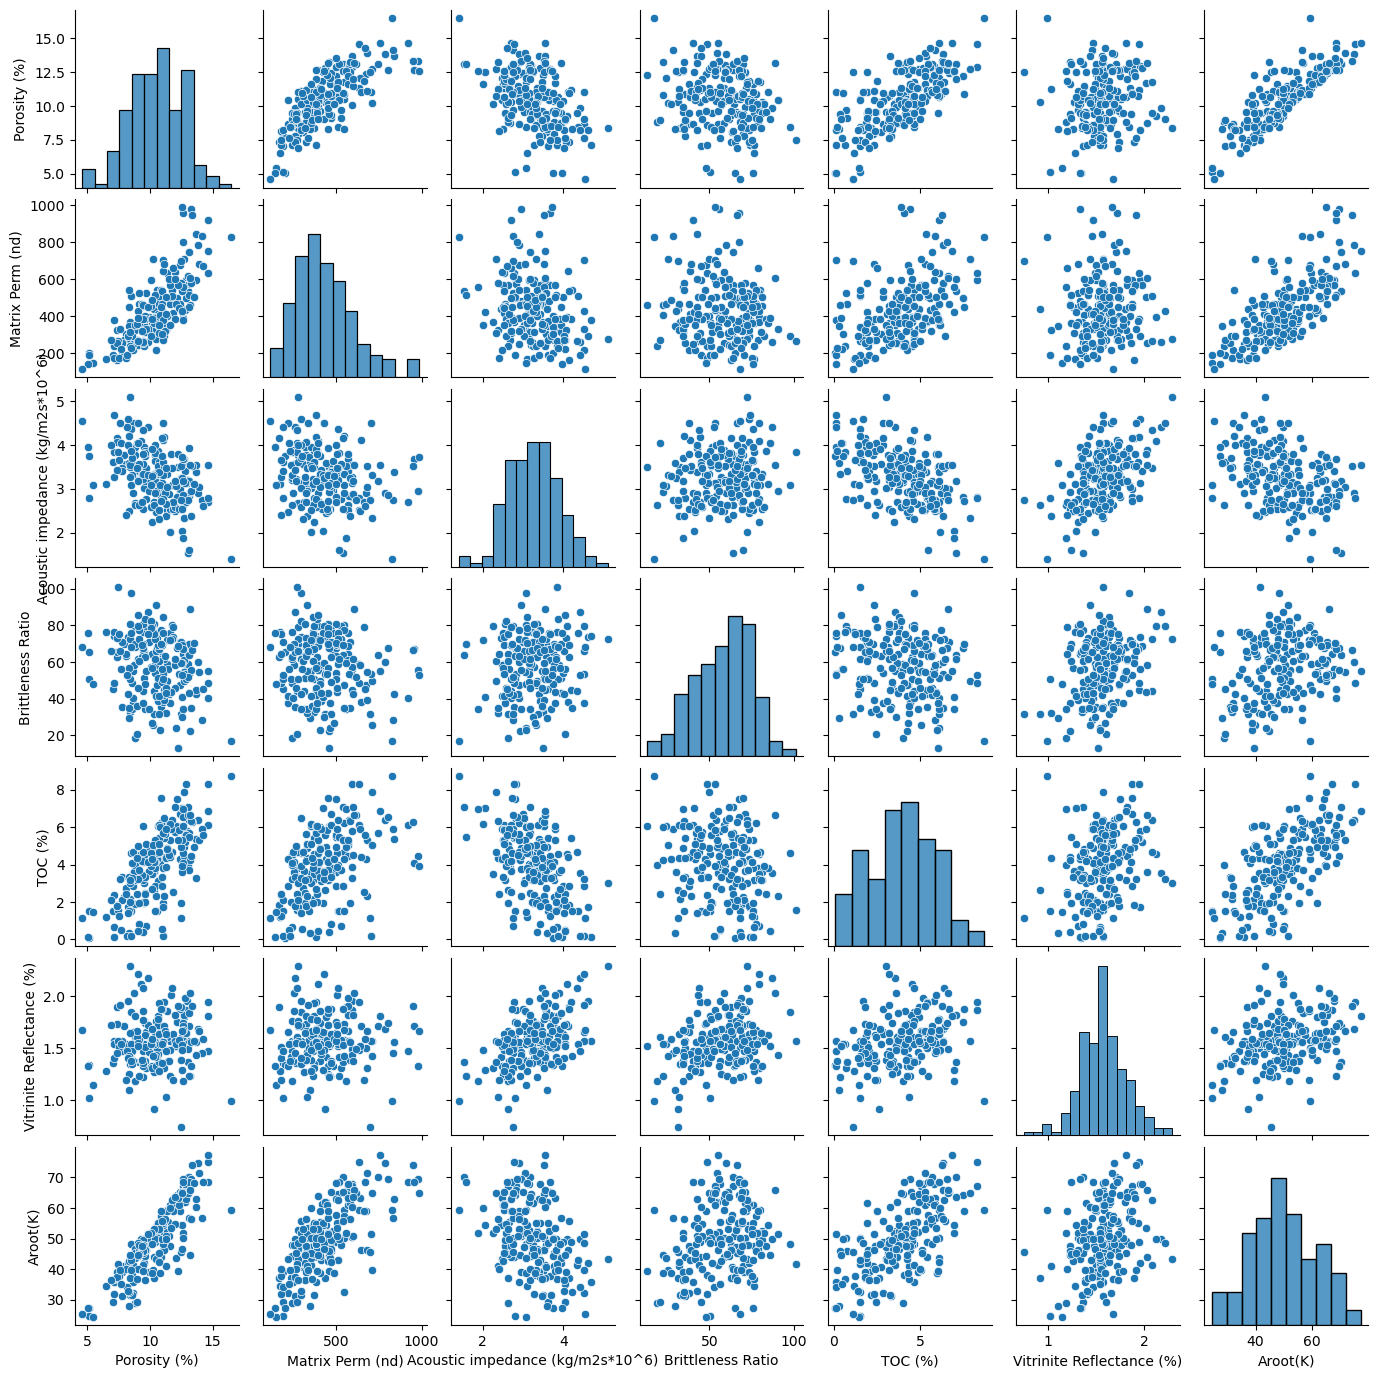

In [21]:
sns.pairplot(data,height=2)
plt.interactive(True)
plt.show()

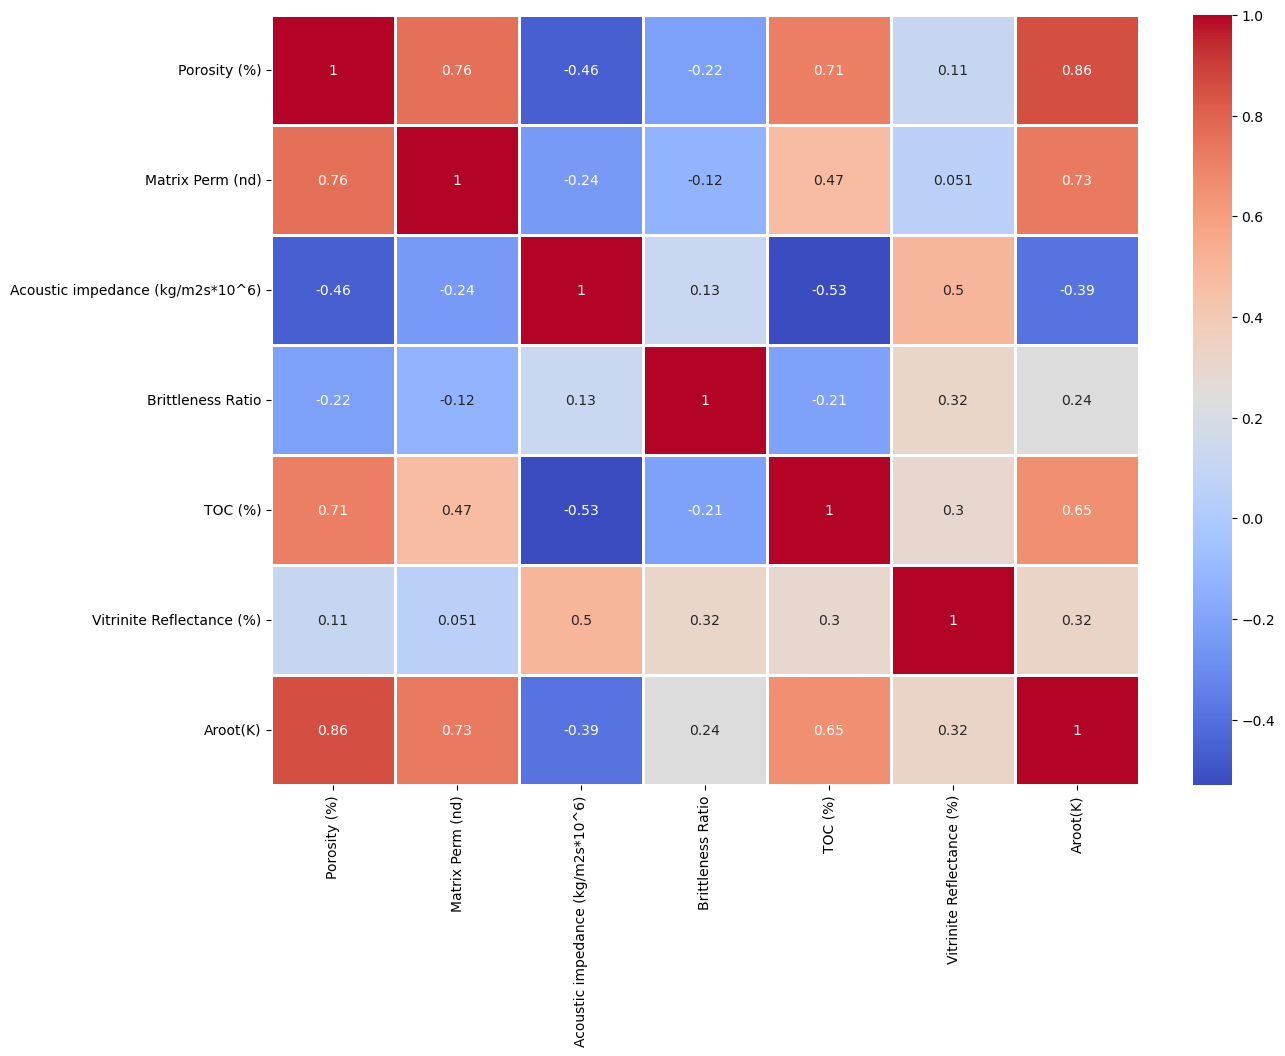

In [22]:
plt.figure(figsize=(14,10))
plt.style.use('default')
sns.heatmap(data.corr(), lw=2, annot=True, cmap='coolwarm')
plt.show()

#### Remove outliers

In [23]:
# remove outlier function
def remove_outlier(data):
    for col in data.columns:
        q1,q3 = data[col].quantile([0.25,0.75])
        iqr = q3-q1
        lower = q1-1.5*iqr
        upper = q3+1.5*iqr
        data[col] =np.where(data[col]<lower,lower,data[col])
        data[col] = np.where(data[col]>upper,upper,data[col])
        return data

In [24]:
data=remove_outlier(data)

In [25]:
# X = features
# Y = target

X = data.drop(['Aroot(K)'], axis=1)
Y = data['Aroot(K)']

In [26]:
X.head()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%)
0,8.456,292,3.080,97.680,4.64,1.848
1,8.666,353,3.542,55.404,3.56,1.504
2,9.814,259,4.411,87.360,3.56,2.176
3,12.369,675,2.893,47.772,4.32,1.504
4,12.264,457,3.498,13.128,6.04,1.520


In [27]:
Y.head()

0    48.306469
1    41.300912
2    49.688356
3    59.132694
4    39.503121
Name: Aroot(K), dtype: float64

#### Split the data

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [30]:
# scale the data
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Building Models

In [31]:
# model evaluation function
def evaluate_model(true,pred):
    print('='*35)
    mae = print('MAE:',mean_absolute_error(true,pred))
    mse = print("MSE:",mean_squared_error(true,pred))
    rmse = print("RMSE:",np.sqrt(mean_squared_error(true,pred)))
    r2 =print("R2_Score:",r2_score(true,pred))
    
    return

### Ridge

Train_score: 0.9646345996833346
Test_score: 0.9139233250559953
MAE: 1.813168741126256
MSE: 7.246080440847734
RMSE: 2.6918544613050193
R2_Score: 0.9139233250559953


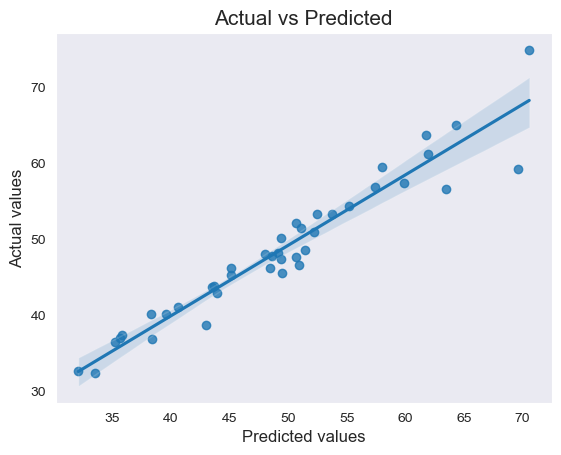

In [33]:
r_model = Ridge()
r_model.fit(x_train,y_train)
y_pred =r_model.predict(x_test)

print('Train_score:',r_model.score(x_train,y_train))
print('Test_score:',r_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)


sns.regplot(x=y_pred,y=y_test,data=data)
plt.xlabel('Predicted values', size=12)
plt.ylabel('Actual values', size=12)
plt.title('Actual vs Predicted', size=15)
plt.grid()


#pd.DataFrame(data={'Actual values':y_test,'Predicted values':y_pred})

### DecisionTreeRegressor

Train_score: 0.9985703136417057
Test_score: 0.7737832908697605
MAE: 3.072261044837499
MSE: 19.043306127797177
RMSE: 4.363863669707977
R2_Score: 0.7737832908697605


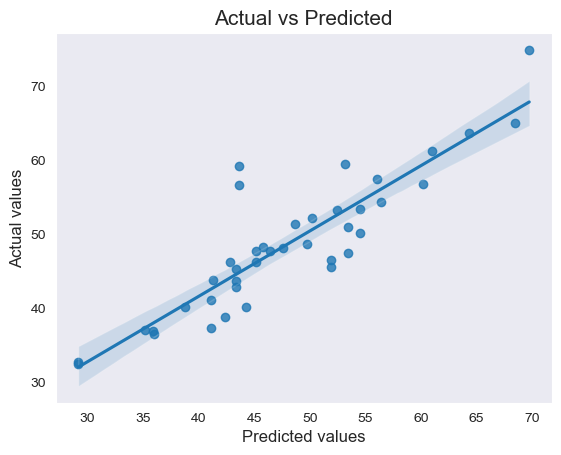

In [45]:
tree_model = DecisionTreeRegressor(criterion='poisson',max_depth=8)
tree_model.fit(x_train,y_train)
y_pred =tree_model.predict(x_test)

print('Train_score:',tree_model.score(x_train,y_train))
print('Test_score:',tree_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)


sns.regplot(x=y_pred,y=y_test,data=data)
plt.xlabel('Predicted values', size=12)
plt.ylabel('Actual values', size=12)
plt.title('Actual vs Predicted', size=15)
plt.grid()

#pd.DataFrame(data={'Actual values':y_test,'Predicted values':y_pred})


### BaggingRegressor

Train_score: 0.9897238346879125
Test_score: 0.9309068743421861
MAE: 1.9185190131885128
MSE: 5.816376466119423
RMSE: 2.4117164978743713
R2_Score: 0.9309068743421861


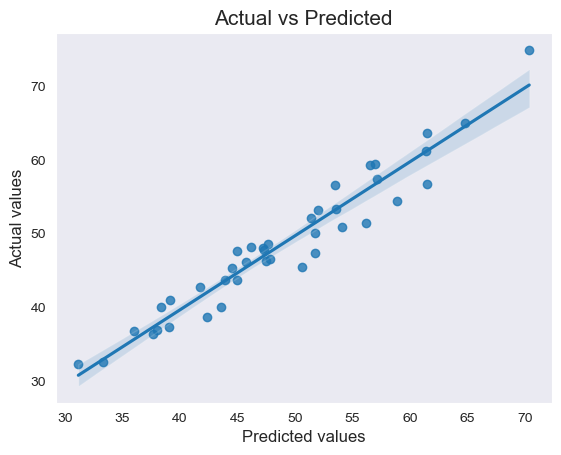

In [46]:
b_model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=6,criterion="poisson"))
b_model.fit(x_train,y_train)
y_pred =b_model.predict(x_test)

print('Train_score:',b_model.score(x_train,y_train))
print('Test_score:',b_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

sns.regplot(x=y_pred,y=y_test,data=data)
plt.xlabel('Predicted values', size=12)
plt.ylabel('Actual values', size=12)
plt.title('Actual vs Predicted', size=15)
plt.grid()

#pd.DataFrame(data={'Actual values':y_test,'Predicted values':y_pred})

- Good model

### GradientBoostRegressor

Train_score: 0.828509217926297
Test_score: 0.7928502033835862
MAE: 3.0539759548444168
MSE: 17.438221104198565
RMSE: 4.175909613988138
R2_Score: 0.7928502033835862


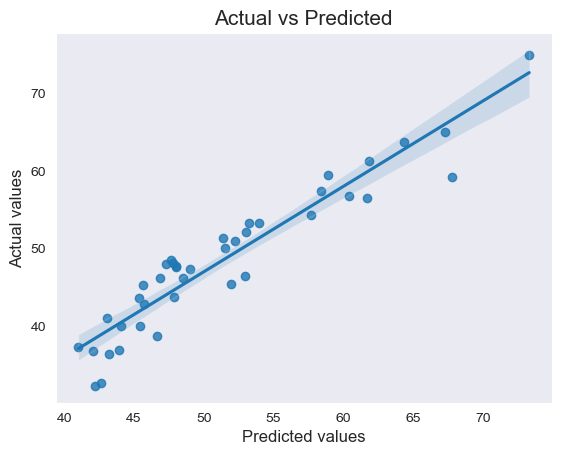

In [47]:
gb_model = GradientBoostingRegressor(max_depth=5,learning_rate=0.2,loss='quantile')
gb_model.fit(x_train,y_train)
y_pred =gb_model.predict(x_test)

print('Train_score:',gb_model.score(x_train,y_train))
print('Test_score:',gb_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

sns.regplot(x=y_pred,y=y_test,data=data)
plt.xlabel('Predicted values', size=12)
plt.ylabel('Actual values', size=12)
plt.title('Actual vs Predicted', size=15)
plt.grid()

#pd.DataFrame(data={'Actual values':y_test,'Predicted values':y_pred})

### RandomForestRegressor

Train_score: 0.9916404531305137
Test_score: 0.9206831135212287
MAE: 2.0384294155364087
MSE: 6.677029986539878
RMSE: 2.5839949664308324
R2_Score: 0.9206831135212287


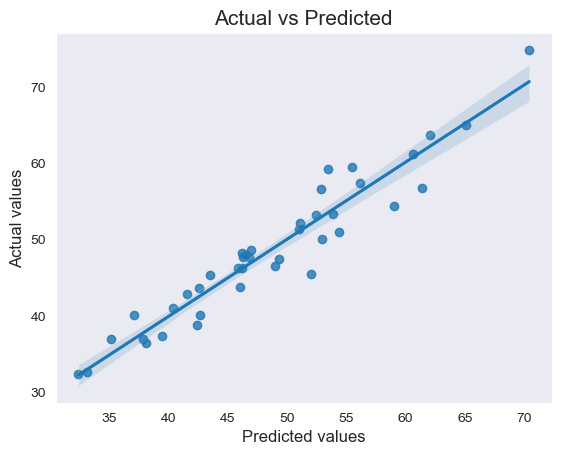

In [50]:
rf_model = RandomForestRegressor(criterion="poisson",max_depth=6)
rf_model.fit(x_train,y_train)
y_pred =rf_model.predict(x_test)

print('Train_score:',rf_model.score(x_train,y_train))
print('Test_score:',rf_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

sns.regplot(x=y_pred,y=y_test,data=data)
plt.xlabel('Predicted values', size=12)
plt.ylabel('Actual values', size=12)
plt.title('Actual vs Predicted', size=15)
plt.grid()


#pd.DataFrame(data={'Actual values':y_test,'Predicted values':y_pred})

### LinearRegression

Train_score: 0.9646947092914804
Test_score: 0.9139066356833561
MAE: 1.807091990961076
MSE: 7.247485380533545
RMSE: 2.6921154099580398
R2_Score: 0.9139066356833561


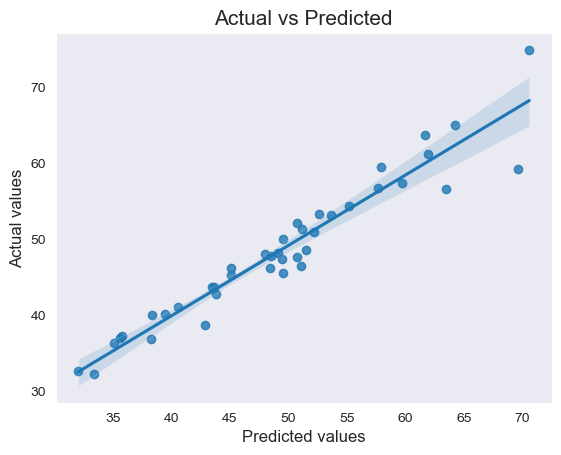

In [39]:

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred =lr_model.predict(x_test)

print('Train_score:',lr_model.score(x_train,y_train))
print('Test_score:',lr_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)


sns.regplot(x=y_pred,y=y_test,data=data)
plt.xlabel('Predicted values', size=12)
plt.ylabel('Actual values', size=12)
plt.title('Actual vs Predicted', size=15)
plt.grid()

#pd.DataFrame(data={'Actual values':y_test,'Predicted values':y_pred})

### SVR

Train_score: 0.8203290733142451
Test_score: 0.835221808451422
MAE: 2.5061900403718385
MSE: 13.871307548010435
RMSE: 3.724420431155757
R2_Score: 0.835221808451422


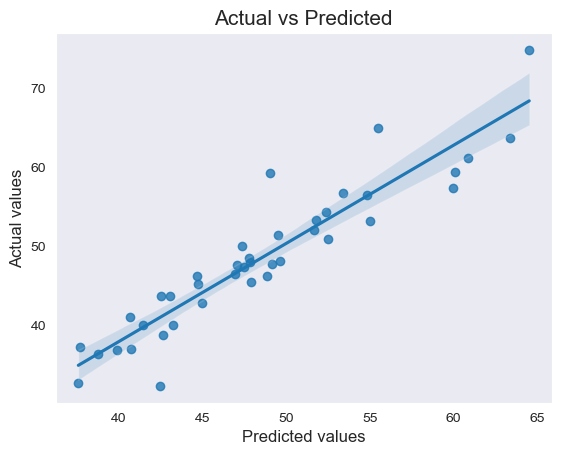

In [40]:
svr_model = SVR()
svr_model.fit(x_train,y_train)
y_pred =svr_model.predict(x_test)

print('Train_score:',svr_model.score(x_train,y_train))
print('Test_score:',svr_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)


sns.regplot(x=y_pred,y=y_test,data=data)
plt.xlabel('Predicted values', size=12)
plt.ylabel('Actual values', size=12)
plt.title('Actual vs Predicted', size=15)
plt.grid()


#pd.DataFrame(data={'Actual values':y_test,'Predicted values':y_pred})

In [61]:
x = sm.add_constant(x_train) # adding constant

model = sm.OLS(y_train,x).fit()
predictions = model.predict(x)

In [62]:
model_stats = model.summary()
print(model_stats)

                            OLS Regression Results                            
Dep. Variable:               Aroot(K)   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     577.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           8.44e-84
Time:                        18:12:29   Log-Likelihood:                 214.05
No. Observations:                 140   AIC:                            -418.1
Df Residuals:                     135   BIC:                            -403.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     